# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

city_names = []
lats = []
longs = []
max_temp = []
humid = []
cloud = []
windspeed = []
country = []
date = []


i=0
set = 1
print("Beginning Data Retrieval")
print("---------------------------")


for city in cities:
    
    if i == 50:
        time.sleep(60)
        i=0
        set+=1
        
    
    query_url = f"{weather_url}q={city}&units=imperial&appid={weather_api_key}"
    weather_response = requests.get(query_url).json()
    i+=1
    print(f"Processing Record {i} of Set {set} | {city}")
    
    # Add city not found message to log output
    if weather_response['cod'] == '404':
        print(f"City not found. Skipping {city}...")
    else:
        city_names.append(city)
        lats.append(weather_response['coord']['lat'])
        longs.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humid.append(weather_response['main']['humidity'])
        cloud.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
    




Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | los llanos de aridane
Processing Record 2 of Set 1 | longhua
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | trapani
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | nueve de julio
Processing Record 8 of Set 1 | atasu
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | lolodorf
Processing Record 12 of Set 1 | asau
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | itacoatiara
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | alsfeld
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | manuk mangkaw
Processing Record 21 of Set 1 | itoman
Processing Record 22 of Set 1 | luderitz
Processing Record 23 of Set 1 | le

Processing Record 33 of Set 4 | faanui
Processing Record 34 of Set 4 | mullaitivu
City not found. Skipping mullaitivu...
Processing Record 35 of Set 4 | derzhavinsk
Processing Record 36 of Set 4 | bredasdorp
Processing Record 37 of Set 4 | san quintin
Processing Record 38 of Set 4 | barcelos
Processing Record 39 of Set 4 | mys shmidta
City not found. Skipping mys shmidta...
Processing Record 40 of Set 4 | muzquiz
City not found. Skipping muzquiz...
Processing Record 41 of Set 4 | aswan
Processing Record 42 of Set 4 | salaverry
Processing Record 43 of Set 4 | souillac
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | vershino-darasunskiy
Processing Record 46 of Set 4 | clyde river
Processing Record 47 of Set 4 | korem
Processing Record 48 of Set 4 | north bend
Processing Record 49 of Set 4 | khromtau
Processing Record 50 of Set 4 | santiago
Processing Record 1 of Set 5 | nishihara
Processing Record 2 of Set 5 | coahuayana
Processing Record 3 of Set 5 | amderma
City 

Processing Record 17 of Set 8 | margate
Processing Record 18 of Set 8 | tacoronte
Processing Record 19 of Set 8 | victoria
Processing Record 20 of Set 8 | hurricane
Processing Record 21 of Set 8 | ucluelet
Processing Record 22 of Set 8 | cascais
Processing Record 23 of Set 8 | olafsvik
Processing Record 24 of Set 8 | matara
Processing Record 25 of Set 8 | esperance
Processing Record 26 of Set 8 | oksfjord
Processing Record 27 of Set 8 | the valley
Processing Record 28 of Set 8 | pangkalanbuun
Processing Record 29 of Set 8 | mahebourg
Processing Record 30 of Set 8 | haibowan
City not found. Skipping haibowan...
Processing Record 31 of Set 8 | salinopolis
Processing Record 32 of Set 8 | korla
Processing Record 33 of Set 8 | bindi
Processing Record 34 of Set 8 | gurupa
Processing Record 35 of Set 8 | ulladulla
Processing Record 36 of Set 8 | lianran
Processing Record 37 of Set 8 | attawapiskat
City not found. Skipping attawapiskat...
Processing Record 38 of Set 8 | phek
Processing Record 

Processing Record 3 of Set 12 | najran
Processing Record 4 of Set 12 | cayenne
Processing Record 5 of Set 12 | hibbing
Processing Record 6 of Set 12 | igrim
Processing Record 7 of Set 12 | falam
Processing Record 8 of Set 12 | faya
Processing Record 9 of Set 12 | mopti
Processing Record 10 of Set 12 | katangli
Processing Record 11 of Set 12 | mezen
Processing Record 12 of Set 12 | jaciara
Processing Record 13 of Set 12 | neiafu
Processing Record 14 of Set 12 | gloucester
Processing Record 15 of Set 12 | alenquer
Processing Record 16 of Set 12 | san policarpo
Processing Record 17 of Set 12 | marzuq
Processing Record 18 of Set 12 | bernalillo
Processing Record 19 of Set 12 | carutapera
Processing Record 20 of Set 12 | port blair
Processing Record 21 of Set 12 | normandin
Processing Record 22 of Set 12 | henties bay
Processing Record 23 of Set 12 | dolores
Processing Record 24 of Set 12 | caraballeda
Processing Record 25 of Set 12 | baker city
Processing Record 26 of Set 12 | mae sot
Proc

In [4]:
len(city_names)


582

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather = pd.DataFrame({"City" : city_names,
                            "Lat" : lats,
                            "Lng" : longs,
                            "Max Temp" : max_temp,
                            "Humidity" : humid,
                            "Cloudiness" : cloud,
                            "Wind Speed" : windspeed,
                            "Country" : country,
                            "Date" : date})

city_weather.to_csv("../output_data/Output_CityWeatherSearch.csv")

city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,los llanos de aridane,28.6585,-17.9182,62.60,72,40,5.75,ES,1611087484
1,longhua,23.6137,114.1919,53.51,51,60,2.08,CN,1611087484
2,ushuaia,-54.8000,-68.3000,62.60,45,20,4.61,AR,1611087217
3,trapani,37.8333,12.6667,55.00,93,20,6.91,IT,1611087484
4,rikitea,-23.1203,-134.9692,77.94,78,49,16.71,PF,1611087484


In [6]:
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,21.074421,19.031806,48.616856,70.445017,52.379725,8.676443,1.611088e+09
std,33.254064,89.487743,33.613375,20.837943,40.482568,6.142713,2.604923e+02
min,-54.800000,-175.200000,-57.590000,9.000000,0.000000,0.110000,1.611087e+09
25%,-6.029175,-58.598700,30.185000,59.250000,3.000000,4.140000,1.611088e+09
50%,25.683350,20.100700,58.530000,75.000000,59.500000,7.010000,1.611088e+09
75%,48.831575,97.350000,75.965000,87.000000,94.000000,11.500000,1.611088e+09
max,78.218600,179.316700,99.820000,100.000000,100.000000,39.080000,1.611088e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_weather.loc[city_weather["Humidity"]>100,].index

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

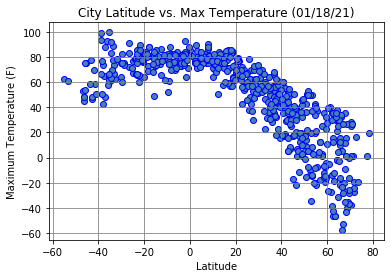

In [13]:
plt.scatter(city_weather["Lat"],city_weather["Max Temp"],c="steelblue",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max Temperature (01/18/21)")
plt.grid(color="grey")
#plt.show()
plt.savefig("../output_data/AllCities_Lat-vs-MaxTemp.png", bbox_inches='tight')

The plot is showing that as latitude increases, the maximum temperature decreases.

## Latitude vs. Humidity Plot

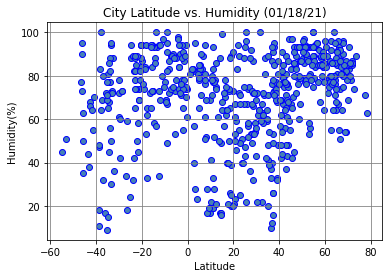

In [14]:
plt.scatter(city_weather["Lat"],city_weather["Humidity"],c="steelblue",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (01/18/21)")
plt.grid(color="grey")
plt.savefig("../output_data/AllCities_Lat-vs-Humidity.png", bbox_inches='tight')

The plot suggests that humidity and city latitude have no correlation or association. The dots are all scattered across the plot without any uniformity or noticeable trends.

## Latitude vs. Cloudiness Plot

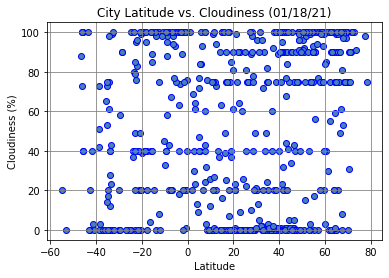

In [15]:
plt.scatter(city_weather["Lat"],city_weather["Cloudiness"],c="steelblue",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (01/18/21)")
plt.grid(color="grey")
plt.savefig("../output_data/AllCities_Lat-vs-Cloudiness.png", bbox_inches='tight')

This plot also suggests there isn't much of an association or correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

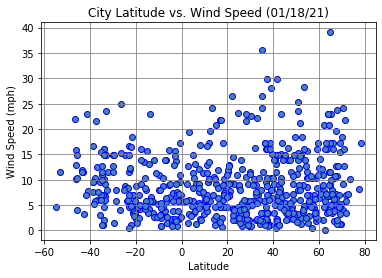

In [16]:
plt.scatter(city_weather["Lat"],city_weather["Wind Speed"],c="steelblue",edgecolors="b")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (01/18/21)")
plt.grid(color="grey")
plt.savefig("../output_data/AllCities_Lat-vs-WindSpeed.png", bbox_inches='tight')

There seems to be no assocation or noticeable trends between latitude and wind speed. However, all wind speeds stay below 40 mph.

## Linear Regression

In [18]:
north = city_weather.loc[city_weather["Lat"]>=0,]
south = city_weather.loc[city_weather["Lat"]<0,]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8399817715754231


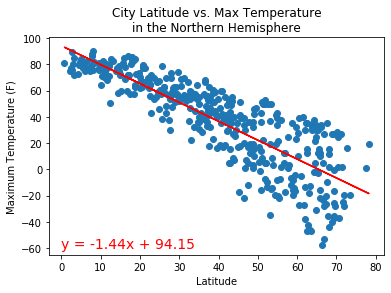

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north["Lat"],north["Max Temp"])
regress_values = north["Lat"] * slope + intercept

corr= st.pearsonr(north["Lat"],north["Max Temp"])
print(f"The r-value is: {corr[0]}")

plt.scatter(north["Lat"],north["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max Temperature\nin the Northern Hemisphere")

plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(0,-60),fontsize=14,color="red")
plt.savefig("../output_data/NorthernCities_Lat-vs-MaxTemp.png", bbox_inches='tight')

There is a strong inverse correlation between the latitude and maximum temperature for cities in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.43413284440841277


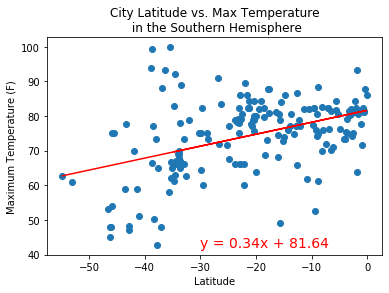

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south["Lat"],south["Max Temp"])
regress_values = south["Lat"] * slope + intercept

corr= st.pearsonr(south["Lat"],south["Max Temp"])
print(f"The r-value is: {corr[0]}")

plt.scatter(south["Lat"],south["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.title("City Latitude vs. Max Temperature\n in the Southern Hemisphere")

plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(-30,42),fontsize=14,color="red")
plt.savefig("../output_data/SouthernCities_Lat-vs-MaxTemp.png", bbox_inches='tight')

There is a moderate correlation between latitude and maximum temperature for cities in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.41340535470645423


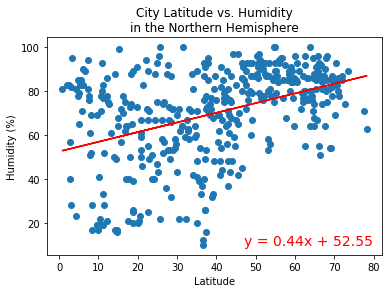

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north["Lat"],north["Humidity"])
regress_values = north["Lat"] * slope + intercept

corr= st.pearsonr(north["Lat"],north["Humidity"])
print(f"The r-value is: {corr[0]}")

plt.scatter(north["Lat"],north["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity\nin the Northern Hemisphere")

plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(47,10),fontsize=14,color="red")
plt.savefig("../output_data/NorthernCities_Lat-vs-Humidity.png", bbox_inches='tight')

There is a weak correlation between latitude and humidity for cities in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.38134100606375987


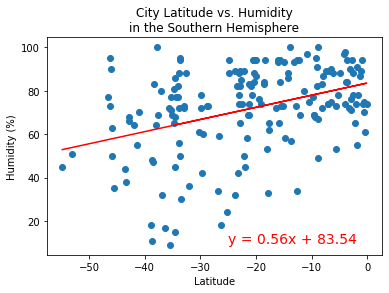

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south["Lat"],south["Humidity"])
regress_values = south["Lat"] * slope + intercept

corr= st.pearsonr(south["Lat"],south["Humidity"])
print(f"The r-value is: {corr[0]}")

plt.scatter(south["Lat"],south["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity\nin the Southern Hemisphere")

plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(-25,10),fontsize=14,color="red")
plt.savefig("../output_data/SouthernCities_Lat-vs-Humidity.png", bbox_inches='tight')

The correlation between latitude and humidity is weak at best for cities in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.31880776096451624


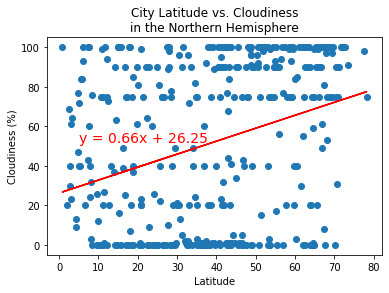

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north["Lat"],north["Cloudiness"])
regress_values = north["Lat"] * slope + intercept

corr= st.pearsonr(north["Lat"],north["Cloudiness"])
print(f"The r-value is: {corr[0]}")

plt.scatter(north["Lat"],north["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness\nin the Northern Hemisphere")

plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(5,52),fontsize=14,color="red")
plt.savefig("../output_data/NorthernCities_Lat-vs-Cloudiness.png", bbox_inches='tight')

The correlation between latitude and cloudiness is weak at best for cities in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3637104440343785


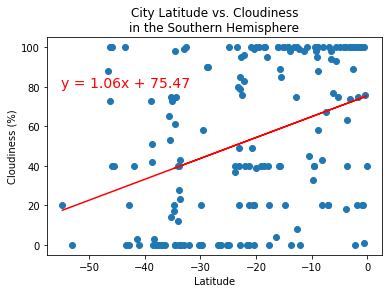

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south["Lat"],south["Cloudiness"])
regress_values = south["Lat"] * slope + intercept

corr= st.pearsonr(south["Lat"],south["Cloudiness"])
print(f"The r-value is: {corr[0]}")

plt.scatter(south["Lat"],south["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness\nin the Southern Hemisphere")

plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(-55,80),fontsize=14,color="red")
plt.savefig("../output_data/SouthernCities_Lat-vs-Cloudiness.png", bbox_inches='tight')

The correlation between latitude and cloudiness is moderate for cities in the Southern Hemisphere, and is stronger than that of the Northern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0969615012400824


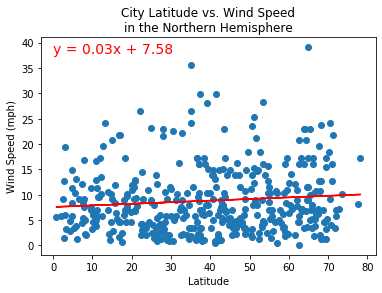

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north["Lat"],north["Wind Speed"])
regress_values = north["Lat"] * slope + intercept

corr= st.pearsonr(north["Lat"],north["Wind Speed"])
print(f"The r-value is: {corr[0]}")

plt.scatter(north["Lat"],north["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed\nin the Northern Hemisphere")

plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(0,38),fontsize=14,color="red")
plt.savefig("../output_data/NorthernCities_Lat-vs-Wind.png", bbox_inches='tight')

The linear regression shows that there is essentially no correlation or association between latitude and wind speed for cities in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.27513038611752183


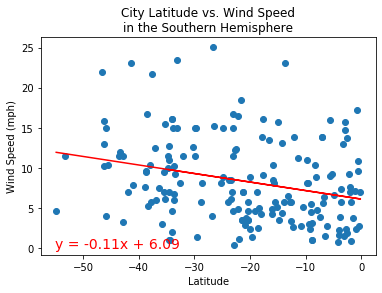

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south["Lat"],south["Wind Speed"])
regress_values = south["Lat"] * slope + intercept

corr= st.pearsonr(south["Lat"],south["Wind Speed"])
print(f"The r-value is: {corr[0]}")

plt.scatter(south["Lat"],south["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed\nin the Southern Hemisphere")

plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(f"y = {round(slope,2)}x + {round(intercept,2)}",(-55,0),fontsize=14,color="red")
plt.savefig("../output_data/SouthernCities_Lat-vs-Wind.png", bbox_inches='tight')

There is a weak inverse correlation between the latitude and wind speed of cities in the Southern Hemisphere.